In [138]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st
from scipy.stats import linregress


In [139]:
# Read in csv
csv_path = Path("spotify-2023.csv")

top_spotify = pd.read_csv(csv_path)
top_spotify

top_spotify_df = pd.DataFrame(top_spotify)
top_spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [140]:
# Drop null values
clean_spotify_df = top_spotify_df.dropna()
clean_spotify_df = clean_spotify_df.drop([574])
clean_spotify_df["streams"] = clean_spotify_df["streams"].astype(int)
clean_spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [141]:
# Groupby number of streams

spotify_streams_df = clean_spotify_df.set_index("streams")
spotify_streams_ranked = spotify_streams_df.sort_values("streams", ascending=False)
spotify_streams_ranked

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,,,,,,,,,,,,,,,,,,,,,
3562543890,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,33,0,...,96,C#,Minor,83,93,65,58,0,9,8
2808096550,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,372,117,...,90,D,Major,76,91,50,54,0,7,5
2713922350,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,433,107,...,104,C#,Major,77,36,63,1,0,36,5
2665343922,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,492,99,...,170,C#,Major,59,48,76,4,0,10,5
2594040133,Believer,Imagine Dragons,1,2017,1,31,18986,23,250,121,...,125,A#,Minor,77,74,78,4,0,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22581161,Rush,Troye Sivan,1,2023,7,13,864,78,71,135,...,126,F,Minor,74,35,84,0,0,11,6
14780425,Overdrive,Post Malone,1,2023,7,14,410,36,36,32,...,140,C#,Major,56,48,73,0,0,35,4
11956641,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,5,2,...,133,B,Minor,93,68,65,42,0,12,25


In [142]:
# Only filter by songs released in 2023

top_streams_2023 = spotify_streams_df[(spotify_streams_df["released_year"] == 2023)]
top_streams_2023_ranked = top_streams_2023.sort_values("streams", ascending=False)
top_streams_2023_ranked

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,,,,,,,,,,,,,,,,,,,,,
725980112,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,34,222,...,148,F,Minor,67,83,76,48,0,8,3
721975598,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,119,108,...,122,D,Minor,78,50,63,27,0,9,5
618990393,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,115,123,...,180,E,Minor,72,61,63,67,0,9,28
553634067,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,49,110,...,170,D,Minor,81,56,48,21,0,8,33
518745108,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,87,86,...,67,C#,Minor,53,50,53,23,0,44,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29562220,New Jeans,NewJeans,1,2023,7,7,77,35,8,166,...,134,E,Minor,81,53,72,51,0,12,5
24975653,Danger (Spider) (Offset & JID),"Offset, JID",2,2023,6,2,214,0,3,3,...,143,B,Major,83,25,69,4,0,23,12
22581161,Rush,Troye Sivan,1,2023,7,13,864,78,71,135,...,126,F,Minor,74,35,84,0,0,11,6


The r-value is: -0.51


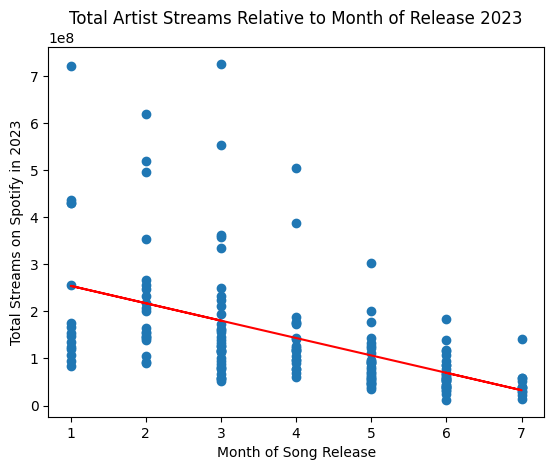

In [143]:
# Plot total streams by release month
x_axis = top_streams_2023_ranked['released_month']
y_axis = top_streams_2023_ranked.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Total Artist Streams Relative to Month of Release 2023')
plt.xlabel('Month of Song Release')
plt.ylabel('Total Streams on Spotify in 2023')
plt.savefig("output_data/streams_x_month.png")
plt.show()



The r-value is: -0.09


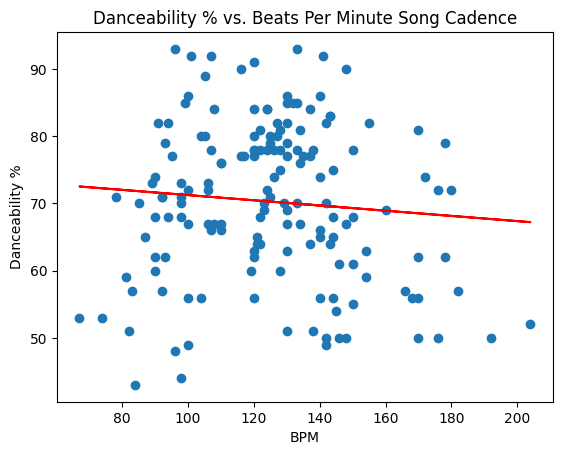

In [144]:
# Trial scatterplot with 2 likely correlated key features (bpm and danceability)
x_axis = top_streams_2023_ranked['bpm']
y_axis = top_streams_2023_ranked["danceability_%"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Danceability % vs. Beats Per Minute Song Cadence')
plt.xlabel('BPM')
plt.ylabel('Danceability %')
plt.savefig("output_data/dance_x_bpm.png")
plt.show()


The r-value is: 0.14


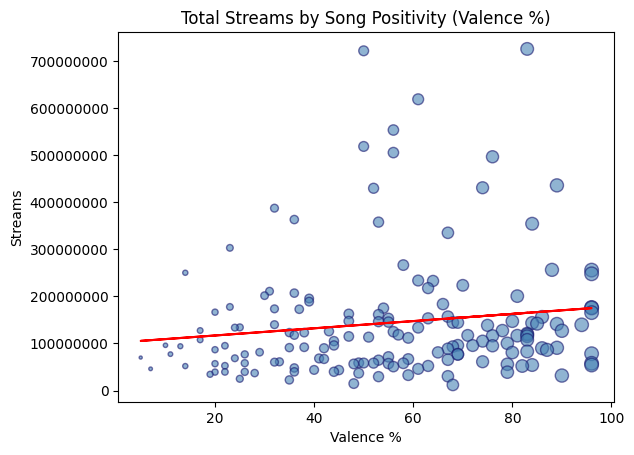

In [227]:
# Streams by valence % (positivity of musical content)
x_axis = top_streams_2023_ranked["valence_%"]
y_axis = top_streams_2023_ranked.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis, marker='o', c="steelblue", edgecolors="midnightblue", alpha=.6, s=x_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Total Streams by Song Positivity (Valence %)')
plt.xlabel('Valence %')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.savefig("output_data/streams_x_positivity.png", bbox_inches="tight")
plt.show()

**Positivity vs. Popularity:** There is a very weak positive correlation between song positivity (valence %) and popularity (number of streams).  More positive songs aren't necessarily more popular and this trend would lean towards that conclusion.

The r-value is: -0.04


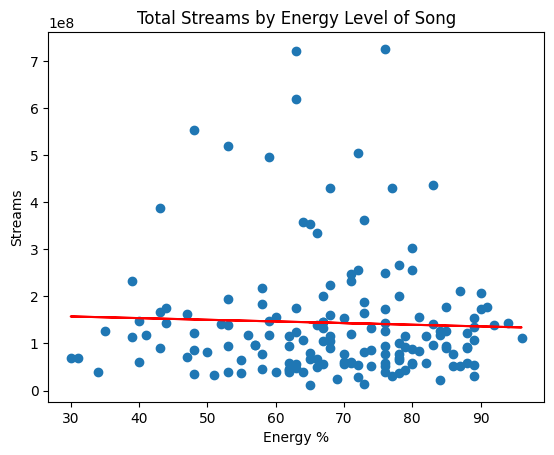

In [146]:
# Popularity by song energy
x_axis = top_streams_2023_ranked["energy_%"]
y_axis = top_streams_2023_ranked.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Total Streams by Energy Level of Song')
plt.xlabel('Energy %')
plt.ylabel('Streams')
plt.savefig("output_data/streams_x_energy.png")
plt.show()

The r-value is: -0.02


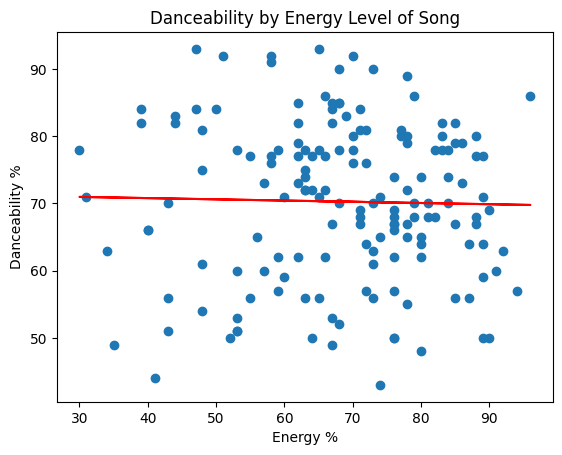

In [147]:
x_axis = top_streams_2023_ranked["energy_%"]
y_axis = top_streams_2023_ranked["danceability_%"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Danceability by Energy Level of Song')
plt.xlabel('Energy %')
plt.ylabel('Danceability %')
plt.savefig("output_data/streams_x_energy.png")
plt.show()

The r-value is: -0.04


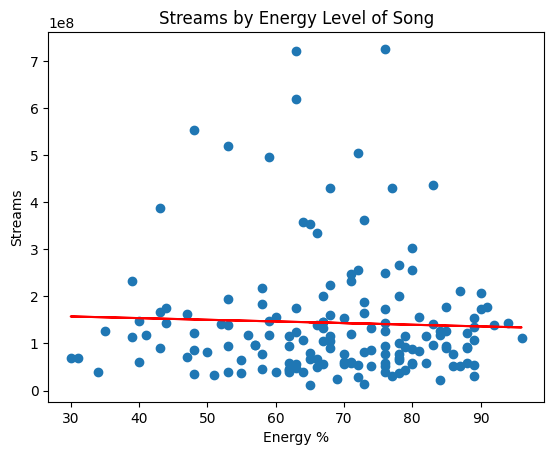

In [148]:
x_axis = top_streams_2023_ranked["energy_%"]
y_axis = top_streams_2023_ranked.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Streams by Energy Level of Song')
plt.xlabel('Energy %')
plt.ylabel('Streams')
plt.savefig("output_data/streams_x_energy.png")
plt.show()

The r-value is: 0.29


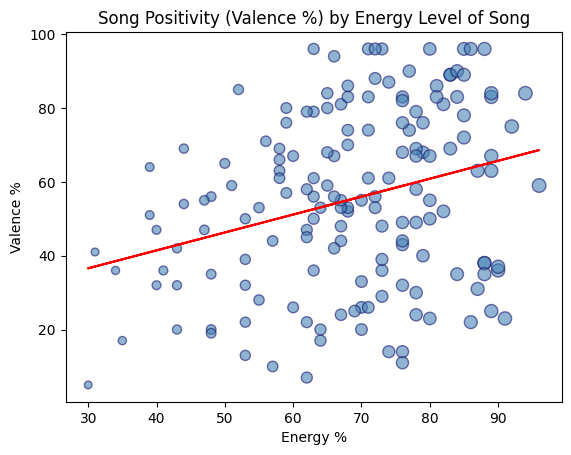

In [205]:
#Energy vs positivity (valence %)
x_axis = top_streams_2023_ranked["energy_%"]
y_axis = top_streams_2023_ranked["valence_%"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis, y_axis)

print(f"The r-value is: {round(correlation[0],2)}")
plt.scatter(x_axis,y_axis, marker='o', c="steelblue", edgecolors="midnightblue", alpha=.6, s=x_axis)
plt.plot(x_axis,regress_values,"r-")

plt.title('Song Positivity (Valence %) by Energy Level of Song')
plt.xlabel('Energy %')
plt.ylabel('Valence %')
plt.savefig("output_data/valence_x_energy.png")
plt.show()

**Energy vs Valence:** There is a weak positive correlation (r = 0.29) between the energy of a song and its positivity.  It makes sense to think that a more positive (valent) song would be more uplifting and energetic.

In [150]:
# Import Alaina's streaming CSV
csv_path2 = Path("2023 Spotify Data.csv")

spotify_data_2023 = pd.read_csv(csv_path2)
spotify_data_2023

spotify_data_2023_df = pd.DataFrame(spotify_data_2023)

del spotify_data_2023_df["uri"]
spotify_data_2023_df


,week,rank,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
0,2023.01,1,SZA,Kill Bill,Top Dawg Entertainment/RCA Records,1,2,4,15030938
1,2023.01,2,"Drake, 21 Savage",Rich Flex,OVO / Republic Records,1,13,9,8469115
2,2023.01,3,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Republic Records,1,12,5,8039812
3,2023.01,4,Taylor Swift,Anti-Hero,Taylor Swift,1,26,11,6821345
4,2023.01,5,Lil Uzi Vert,Just Wanna Rock,Generation Now/Atlantic,5,21,12,6709165
...,...,...,...,...,...,...,...,...,...
9195,2023.44,196,Michael Bublé,It's Beginning to Look a Lot like Christmas,Reprise,7,-1,41,2121166
9196,2023.44,197,Morgan Wallen,Chasin' You,Big Loud Records,55,-1,140,2117578
9197,2023.44,198,"Lil Baby, Drake",Yes Indeed,"Quality Control Music, LLC",2,-1,167,2108074
9198,2023.44,199,Taylor Swift,Blank Space,"Big Machine Records, LLC",34,127,37,2102969


In [151]:
# Index by track name

track_name = spotify_data_2023_df.set_index("track_name")
track_name_sorted = track_name.sort_values("streams", ascending=False)
track_name_sorted

,week,rank,artist_names,source,peak_rank,previous_rank,weeks_on_chart,streams
track_name,,,,,,,,
Flowers,2023.04,1,Miley Cyrus,Columbia,1,1,2,21784758
Flowers,2023.03,1,Miley Cyrus,Columbia,1,-1,1,20849005
Is It Over Now? (Taylor's Version) (From The Vault),2023.43,1,Taylor Swift,Taylor Swift,1,-1,1,20062285
vampire,2023.27,1,Olivia Rodrigo,Olivia Rodrigo PS,1,-1,1,18614248
vampire,2023.28,1,Olivia Rodrigo,Olivia Rodrigo PS,1,-1,1,18614248
...,...,...,...,...,...,...,...,...
Chamber Of Reflection,2023.01,196,Mac DeMarco,Captured Tracks,196,-1,1,1767184
Ni**as In Paris,2023.01,197,"JAY-Z, Kanye West",Roc Nation/RocAFella/IDJ,107,-1,51,1764826
Buy Dirt,2023.01,198,"Jordan Davis, Luke Bryan",MCA Nashville,67,-1,64,1764496


In [152]:
# Index by artist name
artist_name = spotify_data_2023_df.set_index("artist_names")
artist_name_sorted = artist_name.sort_values("streams", ascending=False)
artist_name_sorted

,week,rank,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
artist_names,,,,,,,,
Miley Cyrus,2023.04,1,Flowers,Columbia,1,1,2,21784758
Miley Cyrus,2023.03,1,Flowers,Columbia,1,-1,1,20849005
Taylor Swift,2023.43,1,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1,-1,1,20062285
Olivia Rodrigo,2023.27,1,vampire,Olivia Rodrigo PS,1,-1,1,18614248
Olivia Rodrigo,2023.28,1,vampire,Olivia Rodrigo PS,1,-1,1,18614248
...,...,...,...,...,...,...,...,...
Mac DeMarco,2023.01,196,Chamber Of Reflection,Captured Tracks,196,-1,1,1767184
"JAY-Z, Kanye West",2023.01,197,Ni**as In Paris,Roc Nation/RocAFella/IDJ,107,-1,51,1764826
"Jordan Davis, Luke Bryan",2023.01,198,Buy Dirt,MCA Nashville,67,-1,64,1764496


In [153]:
total_streams_2023 = spotify_data_2023_df.groupby(['track_name', 'artist_names'])['streams'].sum()
total_streams_2023
total_streams_2023_df = pd.DataFrame(total_streams_2023)
total_streams_2023_df

total_streams_2023_df_sorted = total_streams_2023_df.sort_values('streams', ascending=False)
total_streams_2023_df_sorted

,,streams
track_name,artist_names,
Last Night,Morgan Wallen,414584348
Kill Bill,SZA,388686470
Ella Baila Sola,"Eslabon Armado, Peso Pluma",267965608
Flowers,Miley Cyrus,263735971
Boy's a liar Pt. 2,"PinkPantheress, Ice Spice",261903576
...,...,...
On Wat U On (with GloRilla),"Moneybagg Yo, GloRilla",1864790
Billete Grande (En Vivo),"Fuerza Regida, Edgardo Nuñez",1853961
Neverita,Bad Bunny,1837465


In [154]:
artist_total_streams_2023 = spotify_data_2023_df.groupby(['artist_names'])['streams'].sum()
artist_total_streams_2023
artist_total_streams_2023_df = pd.DataFrame(artist_total_streams_2023)
artist_total_streams_2023_df

artist_total_streams_2023_df_sorted = artist_total_streams_2023_df.sort_values('streams', ascending=False)
artist_total_streams_2023_df_sorted.head(10)

top_ten_artists = artist_total_streams_2023_df_sorted.head(10)

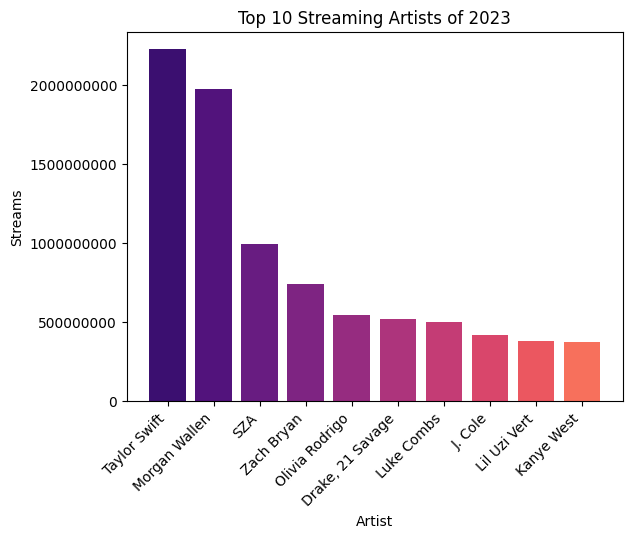

In [226]:
y = top_ten_artists["streams"]
x = top_ten_artists.index
colors = plt.get_cmap("magma")(np.linspace(0.2, 0.7, len(x)))
plt.bar(x, height=y, align="center", color = colors)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.title("Top 10 Streaming Artists of 2023")
plt.xlabel("Artist")
plt.ylabel("Streams")
plt.savefig("output_data/top10streaming_artists2023.png", bbox_inches="tight")
plt.show()

In [156]:
track_total_streams_2023 = spotify_data_2023_df.groupby(['track_name'])['streams'].sum()
track_total_streams_2023
track_total_streams_2023_df = pd.DataFrame(track_total_streams_2023)
track_total_streams_2023_df

track_total_streams_2023_df_sorted = track_total_streams_2023_df.sort_values('streams', ascending=False)
track_total_streams_2023_df_sorted.head()

,streams
track_name,
Last Night,414584348
Kill Bill,388686470
Ella Baila Sola,267965608
Flowers,263735971
Boy's a liar Pt. 2,261903576


In [157]:
# Compare artists from this DataFrame to original spotify-2023.csv

spotify_data_2023_df = spotify_data_2023_df.rename(columns={"artist_names": "Artist", "track_name": "Track Title", "streams": "Total Streams"})
spotify_data_2023_df

,week,rank,Artist,Track Title,source,peak_rank,previous_rank,weeks_on_chart,Total Streams
0,2023.01,1,SZA,Kill Bill,Top Dawg Entertainment/RCA Records,1,2,4,15030938
1,2023.01,2,"Drake, 21 Savage",Rich Flex,OVO / Republic Records,1,13,9,8469115
2,2023.01,3,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Republic Records,1,12,5,8039812
3,2023.01,4,Taylor Swift,Anti-Hero,Taylor Swift,1,26,11,6821345
4,2023.01,5,Lil Uzi Vert,Just Wanna Rock,Generation Now/Atlantic,5,21,12,6709165
...,...,...,...,...,...,...,...,...,...
9195,2023.44,196,Michael Bublé,It's Beginning to Look a Lot like Christmas,Reprise,7,-1,41,2121166
9196,2023.44,197,Morgan Wallen,Chasin' You,Big Loud Records,55,-1,140,2117578
9197,2023.44,198,"Lil Baby, Drake",Yes Indeed,"Quality Control Music, LLC",2,-1,167,2108074
9198,2023.44,199,Taylor Swift,Blank Space,"Big Machine Records, LLC",34,127,37,2102969


In [158]:
clean_spotify_df = clean_spotify_df.rename(columns={"track_name": "Track Title", "artist(s)_name": "Artist", "streams": "Total Streams"})
clean_spotify_df

,Track Title,Artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [159]:
clean_spotify_df_2023 = clean_spotify_df[(clean_spotify_df["released_year"] == 2023)]
clean_spotify_df_2023

,Track Title,Artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Love Again,The Kid Laroi,1,2023,1,27,1283,0,147538971,57,...,107,B,Minor,66,47,40,72,0,11,3
380,LLYLM,ROSALÔøΩ,1,2023,1,27,1838,0,124988687,105,...,170,F#,Minor,56,56,63,13,0,19,27
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790,88,...,122,G#,Major,64,25,89,0,0,15,9
398,MuÔøΩÔøΩ,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253,33,...,90,A#,Minor,68,83,71,3,0,31,8


In [160]:
# Merge two new dataframes

final_spotify_streams_2023 = pd.merge(clean_spotify_df_2023, spotify_data_2023_df, on=["Artist", "Track Title", "Total Streams"], how="outer").reset_index()
final_spotify_streams_2023  = final_spotify_streams_2023.drop(columns=["artist_count", "released_day"])
final_spotify_streams_2023


,index,Track Title,Artist,released_year,released_month,in_spotify_playlists,in_spotify_charts,Total Streams,in_apple_playlists,in_apple_charts,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,week,rank,source,peak_rank,previous_rank,weeks_on_chart
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023.0,7.0,553.0,147.0,141381703,43.0,263.0,...,31.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,LALA,Myke Towers,2023.0,3.0,1474.0,48.0,133716286,48.0,126.0,...,7.0,0.0,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,vampire,Olivia Rodrigo,2023.0,6.0,1397.0,113.0,140003974,94.0,207.0,...,17.0,0.0,31.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,WHERE SHE GOES,Bad Bunny,2023.0,5.0,3133.0,50.0,303236322,84.0,133.0,...,14.0,63.0,11.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Sprinter,"Dave, Central Cee",2023.0,6.0,2186.0,91.0,183706234,67.0,213.0,...,19.0,0.0,8.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9354,9354,It's Beginning to Look a Lot like Christmas,Michael Bublé,NaN,NaN,NaN,NaN,2121166,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,196.0,Reprise,7.0,-1.0,41.0
9355,9355,Chasin' You,Morgan Wallen,NaN,NaN,NaN,NaN,2117578,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,197.0,Big Loud Records,55.0,-1.0,140.0
9356,9356,Yes Indeed,"Lil Baby, Drake",NaN,NaN,NaN,NaN,2108074,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,198.0,"Quality Control Music, LLC",2.0,-1.0,167.0
9357,9357,Blank Space,Taylor Swift,NaN,NaN,NaN,NaN,2102969,NaN,NaN,...,NaN,NaN,NaN,NaN,2023.44,199.0,"Big Machine Records, LLC",34.0,127.0,37.0
